# 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")

In [6]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
df.shape

(3900, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [9]:
cat_cols = ['Gender', 'Category', 'Payment Method', 'Shipping Type']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [10]:
df.groupby('Gender')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


/tmp/ipykernel_36/2169448451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

In [11]:
df['Category'].value_counts().head(10)


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [12]:
df.groupby('Shipping Type')['Purchase Amount (USD)'].sum()


/tmp/ipykernel_36/1618434180.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Shipping Type')['Purchase Amount (USD)'].sum()


Shipping Type
2-Day Shipping    38080
Express           39067
Free Shipping     40777
Next Day Air      37993
Standard          38233
Store Pickup      38931
Name: Purchase Amount (USD), dtype: int64

In [13]:
df['Payment Method'].value_counts(normalize=True) * 100


Payment Method
Credit Card      17.846154
Venmo            16.743590
Cash             16.615385
PayPal           16.358974
Debit Card       16.230769
Bank Transfer    16.205128
Name: proportion, dtype: float64

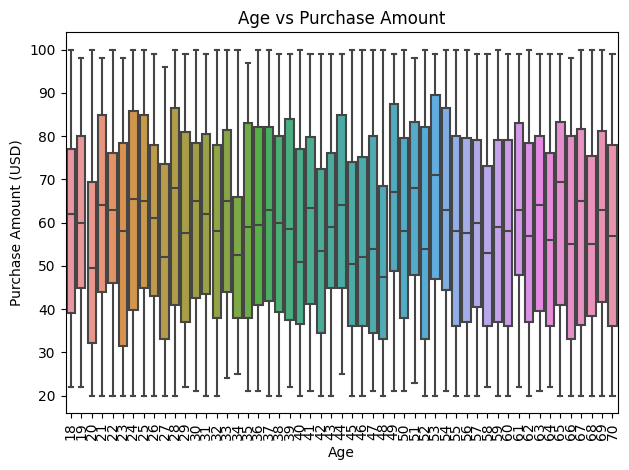

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title("Age vs Purchase Amount")
plt.xticks(rotation=90)  # หรือ 45 ก็ได้
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกคอลัมน์สำหรับการทำ Clustering
X = df[['Age', 'Purchase Amount (USD)']]

# Standardize ข้อมูลก่อน clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering พร้อมกำหนด n_init ให้ชัดเจนเพื่อไม่ให้มี Warning
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)


In [16]:
df.groupby('Segment')[['Age', 'Purchase Amount (USD)']].mean()


,Age,Purchase Amount (USD)
Segment,,
0,53.505673,37.371961
1,28.218182,60.781818
2,54.138019,81.882303


In [24]:
# เริ่มต้น git repository
!git init

# เพิ่ม remote origin (ถ้าคุณมี GitHub repo อยู่แล้ว)
!git remote add origin https://github.com/Dutchy01-del/customer-shopping-insights.git

# เพิ่มไฟล์ลง staging
!git add .

# commit ไฟล์
!git commit -m "Initial commit"

# ตั้งชื่อ branch เป็น main (ถ้าใช้ GitHub ใหม่ ๆ)
!git branch -M main

# push ไปยัง GitHub
!git push -u origin main


Reinitialized existing Git repository in /kaggle/working/.git/
error: remote origin already exists.
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@81362f62d045.(none)')
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/USERNAME/REPO_NAME.git'
